# Final Project - 2

In [1]:
# import libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Executive Summary

ShareCity is an ongoing research carried out by a team of passionate researchers base in Europe. They have an online database (SHARECITY100) which documents food sharing by ICT-enabled organisations across 100 cities around the world. The database is open-access, and the researchers' motivation for creating SHARECITY100 was to make visible the landscape of food sharing in cities by mapping it consistently across a large number of cities. See: http://sharecity.ie/

The database was downloaded for this project. There are 4000+ entries, with 50 entries for Singapore alone. Food sharing is an international movement and it is interesting to see what is happening in Asia and globally. What is being shared and how? How does cities in Asia compare with cities in other parts of the world?

In this project, clustering (unsupervised learning) and aggregate information will be used across different groups (e.g. in different parts of Asia and globally).


# Risk and Assumptions

ShareCity Research is an ongoing project. Assumption is data is comprehensive and consistent enough to highlight trends in different cities.

# Hypothesis

Null hypothesis, $H_0$: Data is not useful to extract information on food sharing in Asia cities, and all 100 cities documented in ShareCity database

Alternative hypothesis, $H_1$: Data is not useful to extract information on food sharing in Asia cities, and all 100 cities documented in ShareCity database. Food sharing in Asia cities has a different pattern in terms of what is shared and how, when compared to other cities.

# Initial data exploration

In [2]:
ShareCity_All = pd.read_csv("data/ShareCity_AllCities.csv")

In [3]:
ShareCity_All.head()

,City,Org_Name,Online_Web,Online_FB,Online_Twitter,Share_Land,Share_Plants,Share_Seeds,Share_Compost,Share_Kitchen,...,How_Selling,How_Bartering,How_Gifting,How_Collecting,Type_ForProfit,Type_SocialEnterprise,Type_NonProfit,Type_Cooperative,Type_Association,Type_Informal
0,Adelaide,Adelaide Central Market Community Kitchen,1,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,Adelaide,Adelaide Hills Produce Swap,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,Adelaide,Adelaide Kitchen Gardeners,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,Adelaide,Adelaide Local Exchange Trading System,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,Adelaide,Australian City Farms and Community Gardens Ne...,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [4]:
ShareCity_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 24 columns):
City                     4009 non-null object
Org_Name                 4009 non-null object
Online_Web               4009 non-null int64
Online_FB                4009 non-null int64
Online_Twitter           4009 non-null int64
Share_Land               4009 non-null int64
Share_Plants             4009 non-null int64
Share_Seeds              4009 non-null int64
Share_Compost            4009 non-null int64
Share_Kitchen            4009 non-null int64
Share_Food               4009 non-null int64
Share_Meals              4009 non-null int64
Share_Knowledge          4009 non-null int64
Share_Skills             4009 non-null int64
How_Selling              4009 non-null int64
How_Bartering            4009 non-null int64
How_Gifting              4009 non-null int64
How_Collecting           4009 non-null int64
Type_ForProfit           4009 non-null int64
Type_SocialEnterprise    4009 non-nu

There are 4012 entries in the ShareCity database, and 24 columns of object information. Besides the city and the name of the organisation, there are columns on the organisation's online presence, what is being shared, how sharing was being carried out, and the type of organisation. All entries have complete data entries. Most of the columns are similar to dummy variables, in that the information is float.

| Column | Type | Description |
| --- | --- | --- | --- |
| City | Object | City |
| Org_Name | Object | Organisation name |
| Online_Web | Object | Online presence - Website |
| Online_FB | Object | Online presence - Facebook |
| Online_Twitter | Object | Online presence - Twitter|
| Share_Land | Object | What is shared - Land |
| Share_Plants | Object | What is shared - Plants |
| Share_Seeds | Object | What is shared - Seeds |
| Share_Compost | Object | What is shared - Compost |
| Share_Kitchen | Object | What is shared - Kitchen |
| Share_Food | Object | What is shared - Food |
| Share_Meals | Object | What is shared - Meals |
| Share_Knowledge | Object | What is shared - Knowledge |
| Share_Skills | Object | What is shared - Skills |
| How_Selling | Object | How is the sharing done - By selling |
| How_Bartering | Object | How is the sharing done - By bartering |
| How_Gifting | Object | How is the sharing done - By gifting |
| How_Collecting | Object | How is the sharing done - By collecting |
| Type_ForProfit | Object | Type of organisation - For profit |
| Type_SocialEnterprise | Object | Type of organisation - Social enterprise |
| Type_NonProfit | Object | Type of organisation - Non-profit |
| Type_Cooperative | Object | Type of organisation - Cooperative |
| Type_Association | Object | Type of organisation - Association |
| Type_Informal | Object | Type of organisation - Informal |


In [5]:
ShareCity_All.describe()

,Online_Web,Online_FB,Online_Twitter,Share_Land,Share_Plants,Share_Seeds,Share_Compost,Share_Kitchen,Share_Food,Share_Meals,...,How_Selling,How_Bartering,How_Gifting,How_Collecting,Type_ForProfit,Type_SocialEnterprise,Type_NonProfit,Type_Cooperative,Type_Association,Type_Informal
count,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.00000,...,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000
mean,0.997256,0.552756,0.350212,0.234223,0.118234,0.118234,0.056373,0.088800,0.383886,0.36443,...,0.428785,0.080319,0.594163,0.101023,0.249688,0.058369,0.347468,0.062609,0.274133,0.202045
std,0.052316,0.497271,0.477096,0.423565,0.322925,0.322925,0.230670,0.284491,0.486391,0.48133,...,0.494964,0.271821,0.491115,0.301396,0.432887,0.234469,0.476225,0.242289,0.446132,0.401576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ShareCity_All.head()

,City,Org_Name,Online_Web,Online_FB,Online_Twitter,Share_Land,Share_Plants,Share_Seeds,Share_Compost,Share_Kitchen,...,How_Selling,How_Bartering,How_Gifting,How_Collecting,Type_ForProfit,Type_SocialEnterprise,Type_NonProfit,Type_Cooperative,Type_Association,Type_Informal
0,Adelaide,Adelaide Central Market Community Kitchen,1,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,Adelaide,Adelaide Hills Produce Swap,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,Adelaide,Adelaide Kitchen Gardeners,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,Adelaide,Adelaide Local Exchange Trading System,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,Adelaide,Australian City Farms and Community Gardens Ne...,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [7]:
ShareCity_All['City'].value_counts()[:5]

London           203
New York City    185
Melbourne        166
Berlin           128
Barcelona        113
Name: City, dtype: int64

In [8]:
ShareCity_All['City'].value_counts()[95:]

Jackson         8
Media           7
Dakar           6
Doha            5
Porto Alegre    4
Name: City, dtype: int64

A total of 100 cities are in the ShareCity database. The top 5 cities with documented food sharing organisations in the database are London (203), New York City (185), Melbourne (166), Berlin (128) and Barcelona (113). The bottom 5 are Jackson, Media, Dakar, Doha, Porto Alegre with 8 or less documented food sharing organisations. Singapore has 50 documented food sharing organisations on the list.

In [9]:
ShareCity_Cityf = ShareCity_All['City'].value_counts()

In [10]:
ShareCity_Cityf.median()

35.5

The median number of food sharing organisations in a city listed in ShareCity organisation is 35.5.

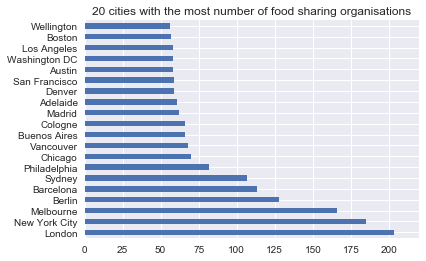

In [11]:
ShareCity_Cityf[:20].plot(kind='barh')
plt.title("20 cities with the most number of food sharing organisations");
plt.xlim(0, 220);

London is the city with the most number of food sharing organisations. The number of food sharing organisations drops visibly from the city with 3rd highest number of food sharing organisations to the city with 4th highest number of similar organisations. Another significant drop occurs between Sydney (6th highest) and Philapdelphia (7th highest). The number of food sharing organisations in a city continues dropping, although at a much slower pace.

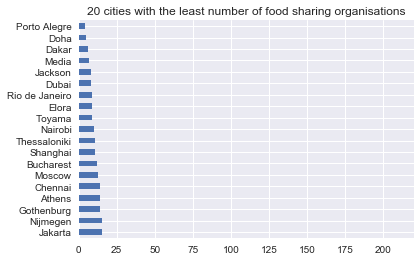

In [12]:
ShareCity_Cityf[81:100].plot(kind='barh')
plt.title("20 cities with the least number of food sharing organisations");
plt.xlim(0, 220);

The 20 cities with the least number of food sharing organisations have less than 25

# classifying the city information into regions and within/outside Asia

In [13]:
Asia = ['Beijing', 'Bengaluru', 'Chennai', 'Hong Kong', 'Jakarta', 'Kuala Lumpur', 'Manila', 'Mumbai', 'Seoul', 'Shanghai', 
        'Singapore', 'Tokyo', 'Toyama']

In [14]:
Africa = ['Dakar', 'Johannesburg', 'Nairobi']

In [15]:
Oceania = ['Adelaide', 'Canberra', 'Christchurch', 'Melbourne', 'Sydney', 'Wellington']

In [16]:
Middle_East = ['Doha', 'Dubai', 'Tel Aviv']

In [17]:
Americas = ['Bogota', 'Buenos Aires', 'Medellin', 'Mexico City', 'Porto Alegre', 'Quito', 'Rio de Janeiro', 'Santiago', 
            'Sao Paulo', 'Ann Arbor', 'Asheville', 'Atlanta', 'Austin', 'Berkeley', 'Bloomington', 'Boston', 'Boulder', 
            'Chicago', 'Cleveland', 'Dallas', 'Denver', 'Detroit', 'Elora', 'Gulfport/Biloxi', 'Houston', 'Hartford',
            'Houston', 'Ithaca', 'Jackson', 'Long Beach', 'Los Angeles', 'Louisville', 'Media', 'Montreal', 'New York City', 
            'Oakland', 'Pittsburgh', 'Philadelphia', 'Portland', 'Rochester', 'San Francisco', 'Santa Cruz', 
            'Seattle', 'St. Louis', 'Toronto', 'Vancouver', 'Washington DC']

In [18]:
Europe = ['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Birmingham', 'Brussels', 'Bucharest', 'Cologne', 'Copenhagen', 
          'Dublin', 'Frankfurt', 'Gothenburg', 'Istanbul', 'Lisbon', 'London', 'Madrid', 'Milan', 'Moscow', 'Naples', 'Nijmegen', 
          'Paris', 'Prague', 'Rome', 'Stockholm', 'Rotterdam', 'Thessaloniki', 'Warsaw', 'Vienna', 'Zurich']

In [19]:
def Region(city):
    if city in Asia:
        return "Asia"
    elif city in Africa:
        return "Africa"
    elif city in Oceania:
        return "Oceania"
    elif city in Middle_East:
        return "Middle East"
    elif city in Americas:
        return "Americas"
    elif city in Europe:
        return "Europe"
    else:
        return "Others"

In [20]:
def In_Asia(city):
    if city in Asia:
        return "Asia"
    else:
        return "Outside Asia"

In [21]:
ShareCity_All['Region'] = ShareCity_All['City'].map(Region)

In [22]:
ShareCity_All['In_Asia'] = ShareCity_All['City'].map(In_Asia)

# food organisations -- online presence

In [23]:
ShareCity_Online = ShareCity_All[['Region', 'In_Asia', 'City', 'Org_Name', 'Online_Web', 'Online_FB', 'Online_Twitter']]

In [24]:
ShareCity_Online.head()

,Region,In_Asia,City,Org_Name,Online_Web,Online_FB,Online_Twitter
0,Oceania,Outside Asia,Adelaide,Adelaide Central Market Community Kitchen,1,1,1
1,Oceania,Outside Asia,Adelaide,Adelaide Hills Produce Swap,1,0,0
2,Oceania,Outside Asia,Adelaide,Adelaide Kitchen Gardeners,1,0,0
3,Oceania,Outside Asia,Adelaide,Adelaide Local Exchange Trading System,1,1,0
4,Oceania,Outside Asia,Adelaide,Australian City Farms and Community Gardens Ne...,1,1,1


In [25]:
# creating a pivot table by indexing with region and city
# the pivot table sums the data in the specified values and summarise them
ShareCity_Online_PivotSum = pd.pivot_table(ShareCity_Online,index=["Region", "In_Asia", "City"], 
                                           values=["Online_Web", "Online_FB", "Online_Twitter"], aggfunc=np.sum)
ShareCity_Online_PivotSum.head()

Online_FB  Online_Twitter  Online_Web
Region   In_Asia      City                                               
Africa   Outside Asia Dakar                 0               0           6
                      Johannesburg         13               9          23
                      Nairobi               9               5          10
Americas Outside Asia Ann Arbor            16              13          35
                      Asheville            18              12          39

In [26]:
ShareCity_Online_Sum = ShareCity_Online_PivotSum.reset_index()
ShareCity_Online_Sum.head()

,Region,In_Asia,City,Online_FB,Online_Twitter,Online_Web
0,Africa,Outside Asia,Dakar,0,0,6
1,Africa,Outside Asia,Johannesburg,13,9,23
2,Africa,Outside Asia,Nairobi,9,5,10
3,Americas,Outside Asia,Ann Arbor,16,13,35
4,Americas,Outside Asia,Asheville,18,12,39


In [27]:
ShareCity_Online_Sum.describe()

,Online_FB,Online_Twitter,Online_Web
count,100.000000,100.000000,100.000000
mean,22.160000,14.040000,39.980000
std,19.180546,14.258735,34.072999
min,0.000000,0.000000,4.000000
25%,9.750000,6.000000,18.000000
50%,18.000000,11.000000,35.500000
75%,29.250000,18.250000,50.000000
max,108.000000,95.000000,203.000000


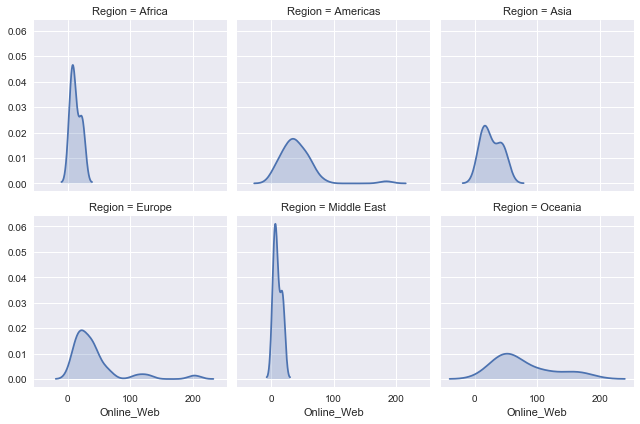

In [28]:
# Facetting histograms by subsetting data
# Kernel Density Estimation - smoothed histogram, shows density so that area under the curve is 1
fg_online = sns.FacetGrid(ShareCity_Online_Sum, col="Region", col_wrap=3)  
fg_online.map(sns.kdeplot, "Online_Web", shade=True)

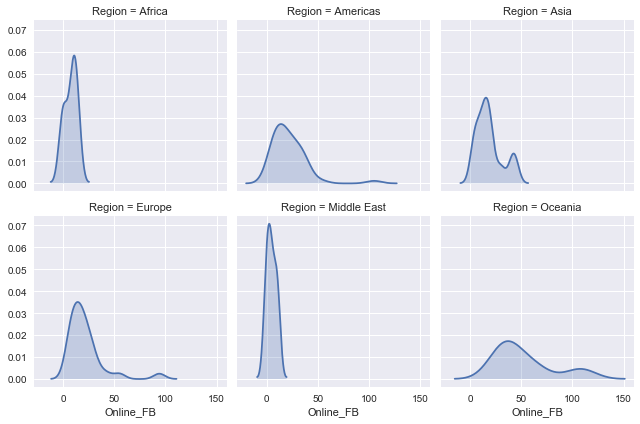

In [29]:
# Facetting histograms by subsetting data
# Kernel Density Estimation - smoothed histogram, shows density so that area under the curve is 1
fg_online = sns.FacetGrid(ShareCity_Online_Sum, col="Region", col_wrap=3)  
fg_online.map(sns.kdeplot, "Online_FB", shade=True)

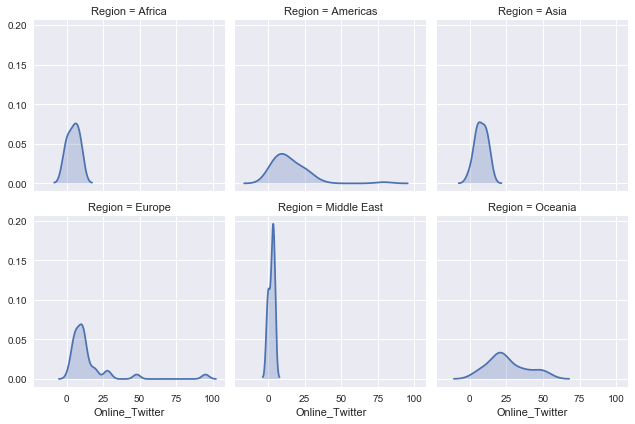

In [30]:
# Facetting histograms by subsetting data
# Kernel Density Estimation - smoothed histogram, shows density so that area under the curve is 1
fg_online = sns.FacetGrid(ShareCity_Online_Sum, col="Region", col_wrap=3)  
bins = np.linspace(0, 200, 10)
fg_online.map(sns.kdeplot, "Online_Twitter", shade=True)

From the above plots, we can see that there are distinct differences in how Web, FB and Twitter as used as ICT platforms by food organisations in different regions.

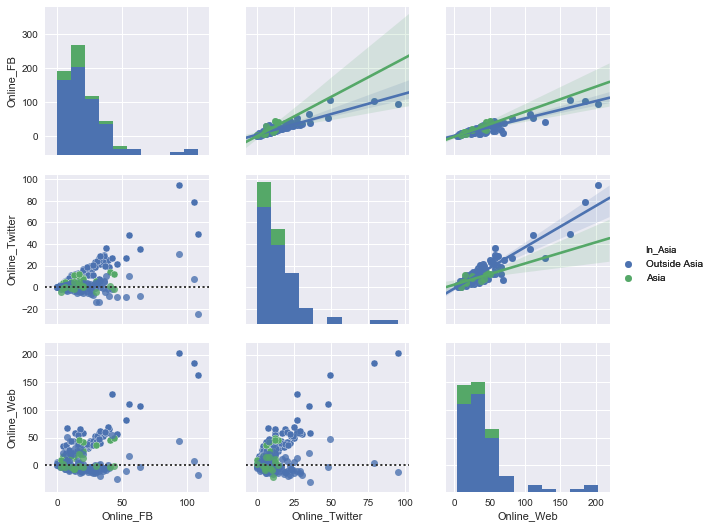

In [31]:
# in the plot below, we compare the differences between use of Web, FB and Twitter in Asia and outside Asia
# pair plot is great for showing the interactions between variables
# the diagonal shows the histogram, the lower left triangle shows the residual plot,
# the upper right triangle shows the regression plot and the 95% confidence interval for that regression

pp_online = sns.pairplot(ShareCity_Online_Sum, hue="In_Asia")
pp_online.map_diag(plt.hist)
pp_online.map_upper(sns.regplot)
pp_online.map_lower(sns.residplot)  
pp_online.add_legend()
pp_online.set(alpha=0.5)  
pp_online.savefig('png/pairplot.png', dpi=200);

Regression plots:

- FB and Twitter - cities in Asia had stronger association between the variables, than cities outside Asia. 95% confidence interval for these 2 variables was also much broader.
- FB and Web - cities in Asia had stronge association between the variables, although this is less than combined use of FB and Twitter.
- Twitter and Web - cities outside Asia had stronger association between the variables, than cities in Asia.

Residual plots:

The information for Web, FB and Twitter all have outliers. Information for cities in Asia are not part of these outliers.

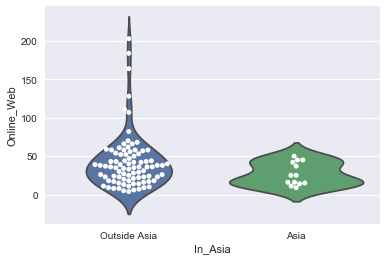

In [32]:
# violin plot - shows the full distibution of data, including the kernel density
# swarm plot - shows the distribution of individual point data
sns.violinplot(x="In_Asia", y="Online_Web", data=ShareCity_Online_Sum, inner=None)
sns.swarmplot(x="In_Asia", y="Online_Web", data=ShareCity_Online_Sum, color="w");

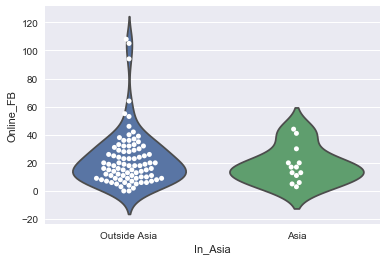

In [33]:
# violin plot - shows the full distibution of data, including the kernel density
# swarm plot - shows the distribution of individual point data
sns.violinplot(x="In_Asia", y="Online_FB", data=ShareCity_Online_Sum, inner=None)
sns.swarmplot(x="In_Asia", y="Online_FB", data=ShareCity_Online_Sum, color="w");

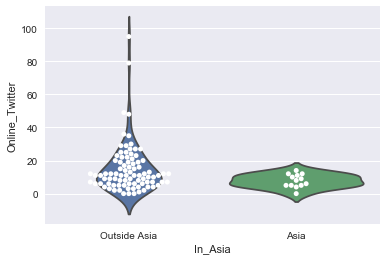

In [34]:
# violin plot - shows the full distibution of data, including the kernel density
# swarm plot - shows the distribution of individual point data
sns.violinplot(x="In_Asia", y="Online_Twitter", data=ShareCity_Online_Sum, inner=None)
sns.swarmplot(x="In_Asia", y="Online_Twitter", data=ShareCity_Online_Sum, color="w");

Violin plot is useful in showing that distribution of the data for Web, FB, Twitter columns is multimodal (i.e. with more than one peak).

# what is shared?

In [35]:
ShareCity_What = ShareCity_All[['Region', 'In_Asia', 'City', 'Org_Name', 'Share_Land', 'Share_Plants', 
                               'Share_Seeds', 'Share_Compost', 'Share_Kitchen', 'Share_Food', 'Share_Meals',
                               'Share_Knowledge', 'Share_Skills']]

In [36]:
ShareCity_What.head()

,Region,In_Asia,City,Org_Name,Share_Land,Share_Plants,Share_Seeds,Share_Compost,Share_Kitchen,Share_Food,Share_Meals,Share_Knowledge,Share_Skills
0,Oceania,Outside Asia,Adelaide,Adelaide Central Market Community Kitchen,0,0,0,0,1,0,0,0,0
1,Oceania,Outside Asia,Adelaide,Adelaide Hills Produce Swap,1,0,0,0,1,1,0,1,1
2,Oceania,Outside Asia,Adelaide,Adelaide Kitchen Gardeners,0,0,0,0,0,0,0,1,1
3,Oceania,Outside Asia,Adelaide,Adelaide Local Exchange Trading System,0,0,0,0,1,1,0,0,0
4,Oceania,Outside Asia,Adelaide,Australian City Farms and Community Gardens Ne...,1,0,0,0,0,0,0,1,1


In [37]:
# creating a pivot table by indexing with region and city
# the pivot table sums the data in the specified values and summarise them
ShareCity_What_PivotSum = pd.pivot_table(ShareCity_What,index=["Region", "In_Asia", "City"], 
                                           values=["Share_Land", "Share_Plants", "Share_Seeds", "Share_Compost",
                                                   "Share_Kitchen", "Share_Food", "Share_Meals", "Share_Knowledge", 
                                                   "Share_Skills"], aggfunc=np.sum)
ShareCity_What_PivotSum.head()

Share_Compost  Share_Food  Share_Kitchen  \
Region   In_Asia      City                                                     
Africa   Outside Asia Dakar                     5           5              0   
                      Johannesburg              0           3              1   
                      Nairobi                   1           4              3   
Americas Outside Asia Ann Arbor                 0           9              1   
                      Asheville                 0          10              3   

                                    Share_Knowledge  Share_Land  Share_Meals  \
Region   In_Asia      City                                                     
Africa   Outside Asia Dakar                       5           5            1   
                      Johannesburg               14           3            8   
                      Nairobi                     5           0            4   
Americas Outside Asia Ann Arbor                  22           3           12   
                      Asheville                  19           8           12   

                                    Share_Plants  Share_Seeds  Share_Skills  
Region   In_Asia      City                                                   
Africa   Outside Asia Dakar                    5            5             5  
                      Johannesburg             0            0            14  
                      Nairobi                  1            1             5  
Americas Outside Asia Ann Arbor                3            3            22  
                      Asheville                5            5            19

In [38]:
ShareCity_What_Sum = ShareCity_What_PivotSum.reset_index()
ShareCity_What_Sum.head()

,Region,In_Asia,City,Share_Compost,Share_Food,Share_Kitchen,Share_Knowledge,Share_Land,Share_Meals,Share_Plants,Share_Seeds,Share_Skills
0,Africa,Outside Asia,Dakar,5,5,0,5,5,1,5,5,5
1,Africa,Outside Asia,Johannesburg,0,3,1,14,3,8,0,0,14
2,Africa,Outside Asia,Nairobi,1,4,3,5,0,4,1,1,5
3,Americas,Outside Asia,Ann Arbor,0,9,1,22,3,12,3,3,22
4,Americas,Outside Asia,Asheville,0,10,3,19,8,12,5,5,19


In [39]:
ShareCity_What_Sum.describe()

,Share_Compost,Share_Food,Share_Kitchen,Share_Knowledge,Share_Land,Share_Meals,Share_Plants,Share_Seeds,Share_Skills
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,2.260000,15.390000,3.560000,21.650000,9.39000,14.610000,4.740000,4.740000,21.650000
std,3.076861,17.126325,3.809398,19.363808,10.62672,11.545164,6.209507,6.209507,19.363808
min,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,4.750000,1.000000,9.750000,3.00000,8.000000,1.000000,1.000000,9.750000
50%,1.000000,12.000000,2.000000,17.000000,6.00000,12.000000,4.000000,4.000000,17.000000
75%,3.000000,21.250000,5.000000,28.000000,11.25000,18.000000,6.000000,6.000000,28.000000
max,14.000000,121.000000,18.000000,107.000000,55.00000,80.000000,39.000000,39.000000,107.000000


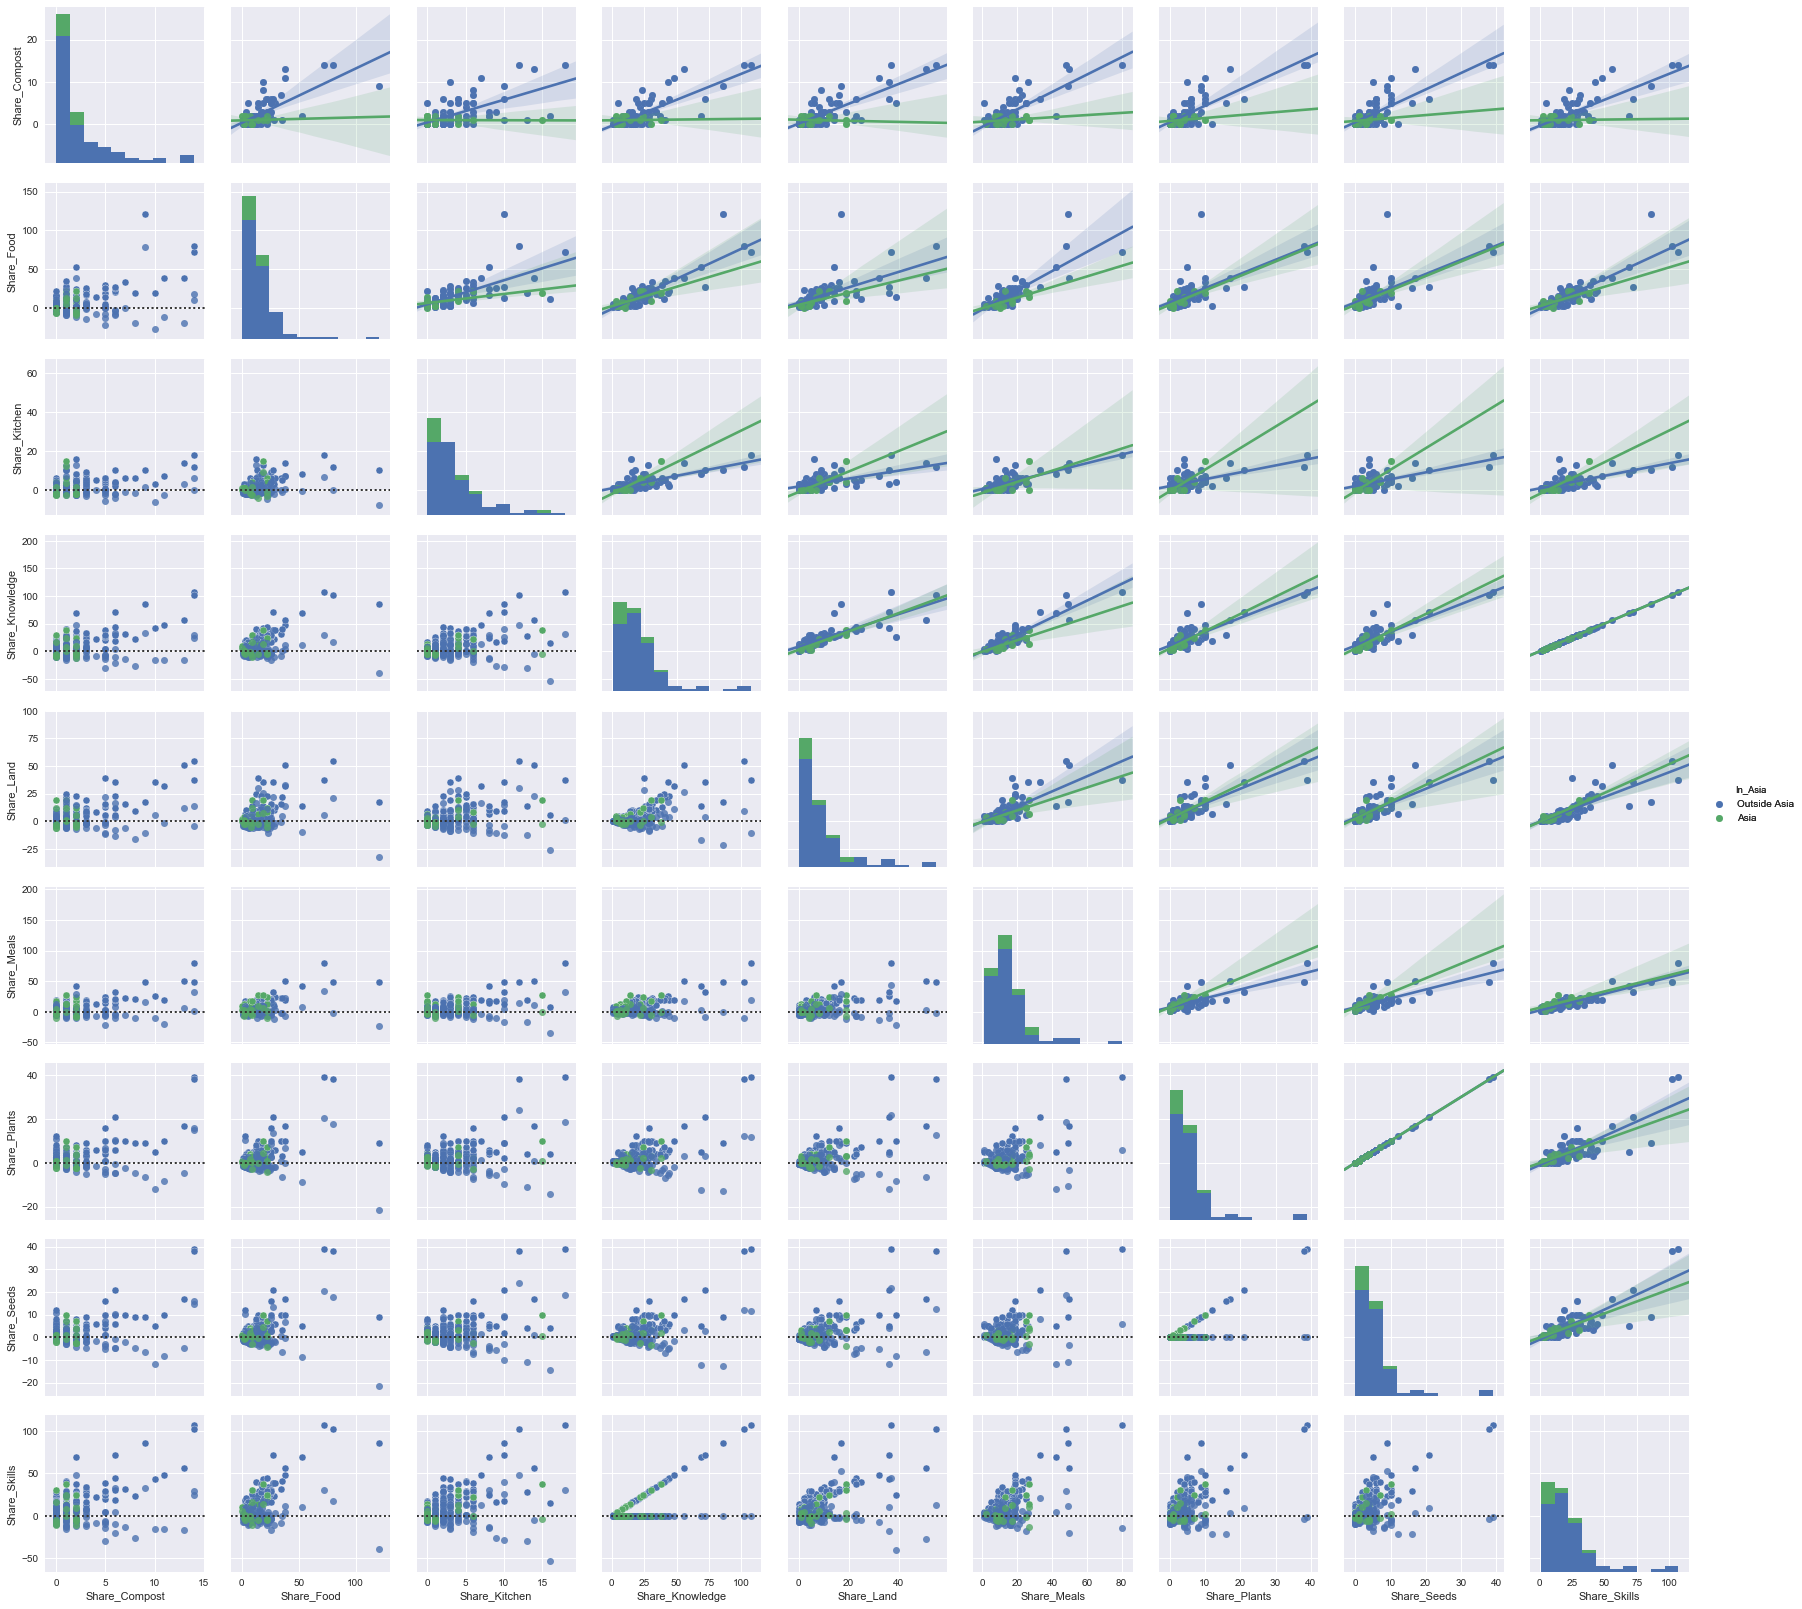

In [40]:
# in the plot below, we compare the differences between use of Web, FB and Twitter in Asia and outside Asia
# pair plot is great for showing the interactions between variables
# the diagonal shows the histogram, the lower left triangle shows the residual plot,
# the upper right triangle shows the regression plot and the 95% confidence interval for that regression

pp_online = sns.pairplot(ShareCity_What_Sum, hue="In_Asia")
pp_online.map_diag(plt.hist)
pp_online.map_upper(sns.regplot)
pp_online.map_lower(sns.residplot)  
pp_online.add_legend()
pp_online.set(alpha=0.5)  
pp_online.savefig('png/pairplot2.png', dpi=200);

Some interesting findings from the pairplot above:

- For cities outside Asia, "Share_compost" had stronger correlation for entire range of variables, especially for food sharing, meal sharing, plant sharing and seed sharing, compared to cities in Asia.

- For cities in Asia, "Share_kitchen" also have stronger correlation with other sharing options, compared to cities outside Asia.

- For cities in Asia, "Share_meal" tend to be shared with plants, seeds and skills.

- Interestingly, the combination of "Share_knowledge" with "share_land" and "share_skills" has similar correlation for both cities in Asia and outside Asia.

In [41]:
ShareCity_What_Sum_Asia = ShareCity_What_Sum[ShareCity_What_Sum.In_Asia == "Asia"]
ShareCity_What_Sum_Asia.head()

,Region,In_Asia,City,Share_Compost,Share_Food,Share_Kitchen,Share_Knowledge,Share_Land,Share_Meals,Share_Plants,Share_Seeds,Share_Skills
49,Asia,Asia,Beijing,0,2,1,6,1,12,1,1,6
50,Asia,Asia,Bengaluru,2,7,0,11,5,17,4,4,11
51,Asia,Asia,Chennai,0,9,0,3,5,8,0,0,3
52,Asia,Asia,Hong Kong,1,22,6,22,8,13,2,2,22
53,Asia,Asia,Jakarta,2,3,0,3,1,9,1,1,3


In [42]:
ShareCity_What_Sum_Other = ShareCity_What_Sum[ShareCity_What_Sum.In_Asia == "Outside Asia"]
ShareCity_What_Sum_Other.head()

,Region,In_Asia,City,Share_Compost,Share_Food,Share_Kitchen,Share_Knowledge,Share_Land,Share_Meals,Share_Plants,Share_Seeds,Share_Skills
0,Africa,Outside Asia,Dakar,5,5,0,5,5,1,5,5,5
1,Africa,Outside Asia,Johannesburg,0,3,1,14,3,8,0,0,14
2,Africa,Outside Asia,Nairobi,1,4,3,5,0,4,1,1,5
3,Americas,Outside Asia,Ann Arbor,0,9,1,22,3,12,3,3,22
4,Americas,Outside Asia,Asheville,0,10,3,19,8,12,5,5,19


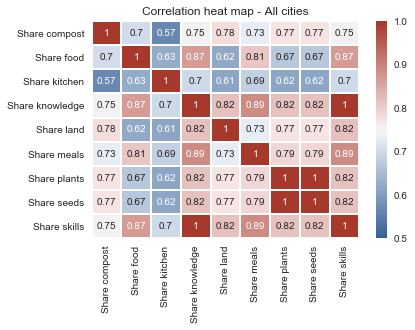

In [43]:
labels = ["Share compost", "Share food", "Share kitchen", "Share knowledge", 
          "Share land", "Share meals", "Share plants", "Share seeds", "Share skills"]
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, as_cmap=True)
sns.heatmap(ShareCity_What_Sum.corr(), vmin=0.5, vmax=1, xticklabels=labels, yticklabels=labels, linewidths=1.0, annot=True, cmap=cmap)
plt.title("Correlation heat map - All cities")
plt.show()

When all cities are taken into account, sharing of plants and seeds are most likely to happen together, as with sharing of knowledge and skills. Some other activities are quite strongly related, e.g. sharing of skills with sharing of meals, food, seeds, land, compost and kitchen. All variables are have correlation coefficient > 0.5.

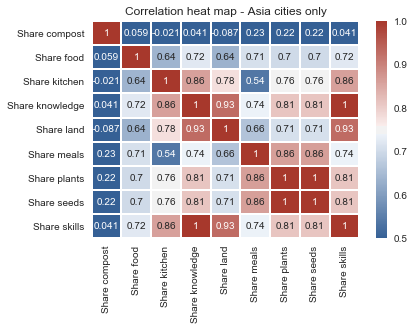

In [44]:
labels = ["Share compost", "Share food", "Share kitchen", "Share knowledge", 
          "Share land", "Share meals", "Share plants", "Share seeds", "Share skills"]
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, as_cmap=True)
sns.heatmap(ShareCity_What_Sum_Asia.corr(), vmin=0.5, vmax=1, xticklabels=labels, yticklabels=labels, linewidths=1.0, annot=True, cmap=cmap)
plt.title("Correlation heat map - Asia cities only")
plt.show()

When only Asia cities are taken into account, compost sharing stands out as it is less correlated with the other variables (e.g. 0.23 for sharing of meals, and only 0.041 when it comes to sharing skills). Sharing of compost even has negative correlation with sharing of kitchen space.

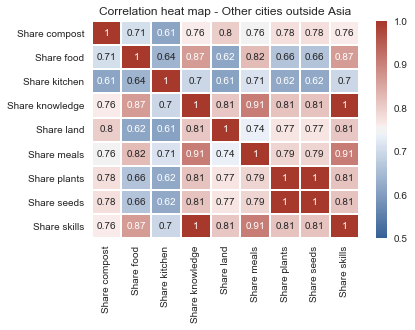

In [45]:
labels = ["Share compost", "Share food", "Share kitchen", "Share knowledge", 
          "Share land", "Share meals", "Share plants", "Share seeds", "Share skills"]
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, as_cmap=True)
sns.heatmap(ShareCity_What_Sum_Other.corr(), vmin=0.5, vmax=1, xticklabels=labels, yticklabels=labels, linewidths=1.0, annot=True, cmap=cmap)
plt.title("Correlation heat map - Other cities outside Asia")
plt.show()

# How is the sharing done?

In [46]:
ShareCity_How = ShareCity_All[['Region', 'In_Asia', 'City', 'Org_Name', 'How_Selling', 'How_Bartering', 
                               'How_Gifting', 'How_Collecting']]

In [47]:
# creating a pivot table by indexing with region and city
# the pivot table sums the data in the specified values and summarise them
ShareCity_How_PivotSum = pd.pivot_table(ShareCity_How,index=["Region", "In_Asia", "City"], 
                                         values=['How_Selling', 'How_Bartering', 'How_Gifting', 'How_Collecting'], 
                                         aggfunc=np.sum)
ShareCity_How_PivotSum.head()

How_Bartering  How_Collecting  \
Region   In_Asia      City                                          
Africa   Outside Asia Dakar                     3               0   
                      Johannesburg              1               0   
                      Nairobi                   0               2   
Americas Outside Asia Ann Arbor                 1               0   
                      Asheville                 1               4   

                                    How_Gifting  How_Selling  
Region   In_Asia      City                                    
Africa   Outside Asia Dakar                   5            1  
                      Johannesburg           17            8  
                      Nairobi                 7            4  
Americas Outside Asia Ann Arbor              22           12  
                      Asheville              21           17

In [48]:
ShareCity_How_Sum = ShareCity_How_PivotSum.reset_index()
ShareCity_How_Sum.head()

,Region,In_Asia,City,How_Bartering,How_Collecting,How_Gifting,How_Selling
0,Africa,Outside Asia,Dakar,3,0,5,1
1,Africa,Outside Asia,Johannesburg,1,0,17,8
2,Africa,Outside Asia,Nairobi,0,2,7,4
3,Americas,Outside Asia,Ann Arbor,1,0,22,12
4,Americas,Outside Asia,Asheville,1,4,21,17


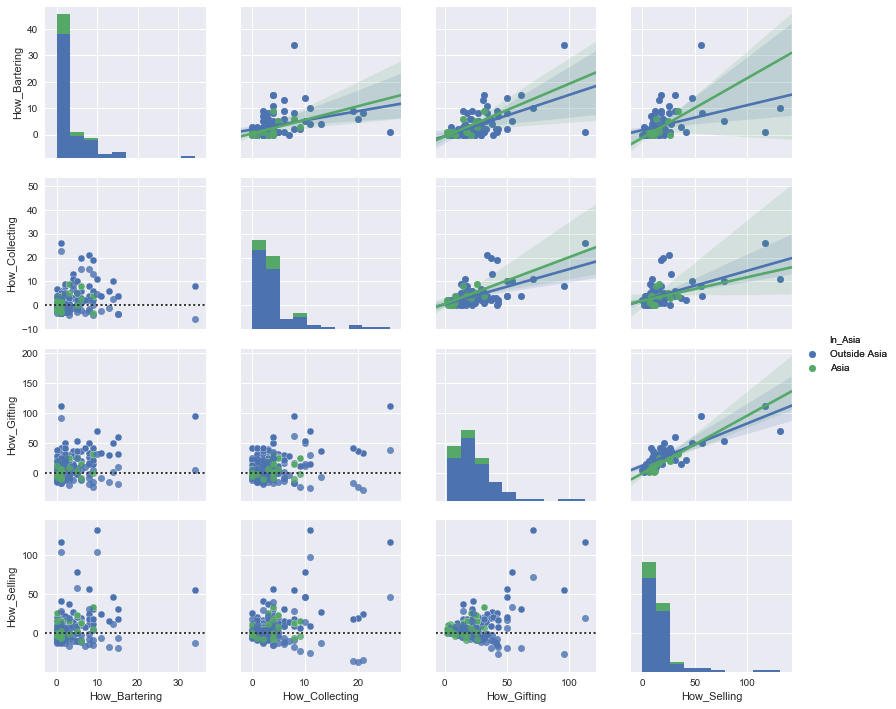

In [49]:
# pair plot
pp_how = sns.pairplot(ShareCity_How_Sum, hue="In_Asia")
pp_how.map_diag(plt.hist)
pp_how.map_upper(sns.regplot)
pp_how.map_lower(sns.residplot)  
pp_how.add_legend()
pp_how.set(alpha=0.5)  
pp_how.savefig('png/pairplot3.png', dpi=200);

# type of organisations

In [50]:
ShareCity_Org = ShareCity_All[['Region', 'In_Asia', 'City', 'Org_Name', 'Type_ForProfit', 'Type_SocialEnterprise',
                               'Type_NonProfit', 'Type_Cooperative', 'Type_Association', 'Type_Informal']]

In [51]:
ShareCity_Org.head()

,Region,In_Asia,City,Org_Name,Type_ForProfit,Type_SocialEnterprise,Type_NonProfit,Type_Cooperative,Type_Association,Type_Informal
0,Oceania,Outside Asia,Adelaide,Adelaide Central Market Community Kitchen,1,0,0,0,0,0
1,Oceania,Outside Asia,Adelaide,Adelaide Hills Produce Swap,0,0,0,0,0,1
2,Oceania,Outside Asia,Adelaide,Adelaide Kitchen Gardeners,0,0,0,0,0,1
3,Oceania,Outside Asia,Adelaide,Adelaide Local Exchange Trading System,0,0,0,0,1,0
4,Oceania,Outside Asia,Adelaide,Australian City Farms and Community Gardens Ne...,0,0,0,0,0,1


In [52]:
# creating a pivot table by indexing with region and city
# the pivot table sums the data in the specified values and summarise them
ShareCity_Org_PivotSum = pd.pivot_table(ShareCity_Org,index=["Region", "In_Asia", "City"], 
                                           values=["Type_ForProfit", "Type_SocialEnterprise", "Type_NonProfit",
                                                   "Type_Cooperative", "Type_Association", "Type_Informal"], aggfunc=np.sum)
ShareCity_Org_PivotSum.head()

Type_Association  Type_Cooperative  \
Region   In_Asia      City                                               
Africa   Outside Asia Dakar                        4                 0   
                      Johannesburg                 4                 2   
                      Nairobi                      0                 0   
Americas Outside Asia Ann Arbor                    5                 1   
                      Asheville                    9                 4   

                                    Type_ForProfit  Type_Informal  \
Region   In_Asia      City                                          
Africa   Outside Asia Dakar                      1              2   
                      Johannesburg               4              7   
                      Nairobi                    2              5   
Americas Outside Asia Ann Arbor                  7             17   
                      Asheville                 10              9   

                                    Type_NonProfit  Type_SocialEnterprise  
Region   In_Asia      City                                                 
Africa   Outside Asia Dakar                      0                      0  
                      Johannesburg               8                      2  
                      Nairobi                    4                      2  
Americas Outside Asia Ann Arbor                  7                      0  
                      Asheville                 13                      0

In [53]:
ShareCity_Org_Sum = ShareCity_Org_PivotSum.reset_index()
ShareCity_Org_Sum.head()

,Region,In_Asia,City,Type_Association,Type_Cooperative,Type_ForProfit,Type_Informal,Type_NonProfit,Type_SocialEnterprise
0,Africa,Outside Asia,Dakar,4,0,1,2,0,0
1,Africa,Outside Asia,Johannesburg,4,2,4,7,8,2
2,Africa,Outside Asia,Nairobi,0,0,2,5,4,2
3,Americas,Outside Asia,Ann Arbor,5,1,7,17,7,0
4,Americas,Outside Asia,Asheville,9,4,10,9,13,0


In [54]:
ShareCity_Org_Sum.describe()

,Type_Association,Type_Cooperative,Type_ForProfit,Type_Informal,Type_NonProfit,Type_SocialEnterprise
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,10.990000,2.510000,10.010000,8.100000,13.930000,2.340000
std,15.225905,3.963202,9.258897,5.714592,11.996847,4.492912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,4.750000,6.000000,0.000000
50%,5.000000,1.000000,8.000000,7.000000,11.000000,1.000000
75%,14.000000,3.000000,14.000000,11.000000,19.000000,3.000000
max,97.000000,29.000000,68.000000,35.000000,66.000000,36.000000


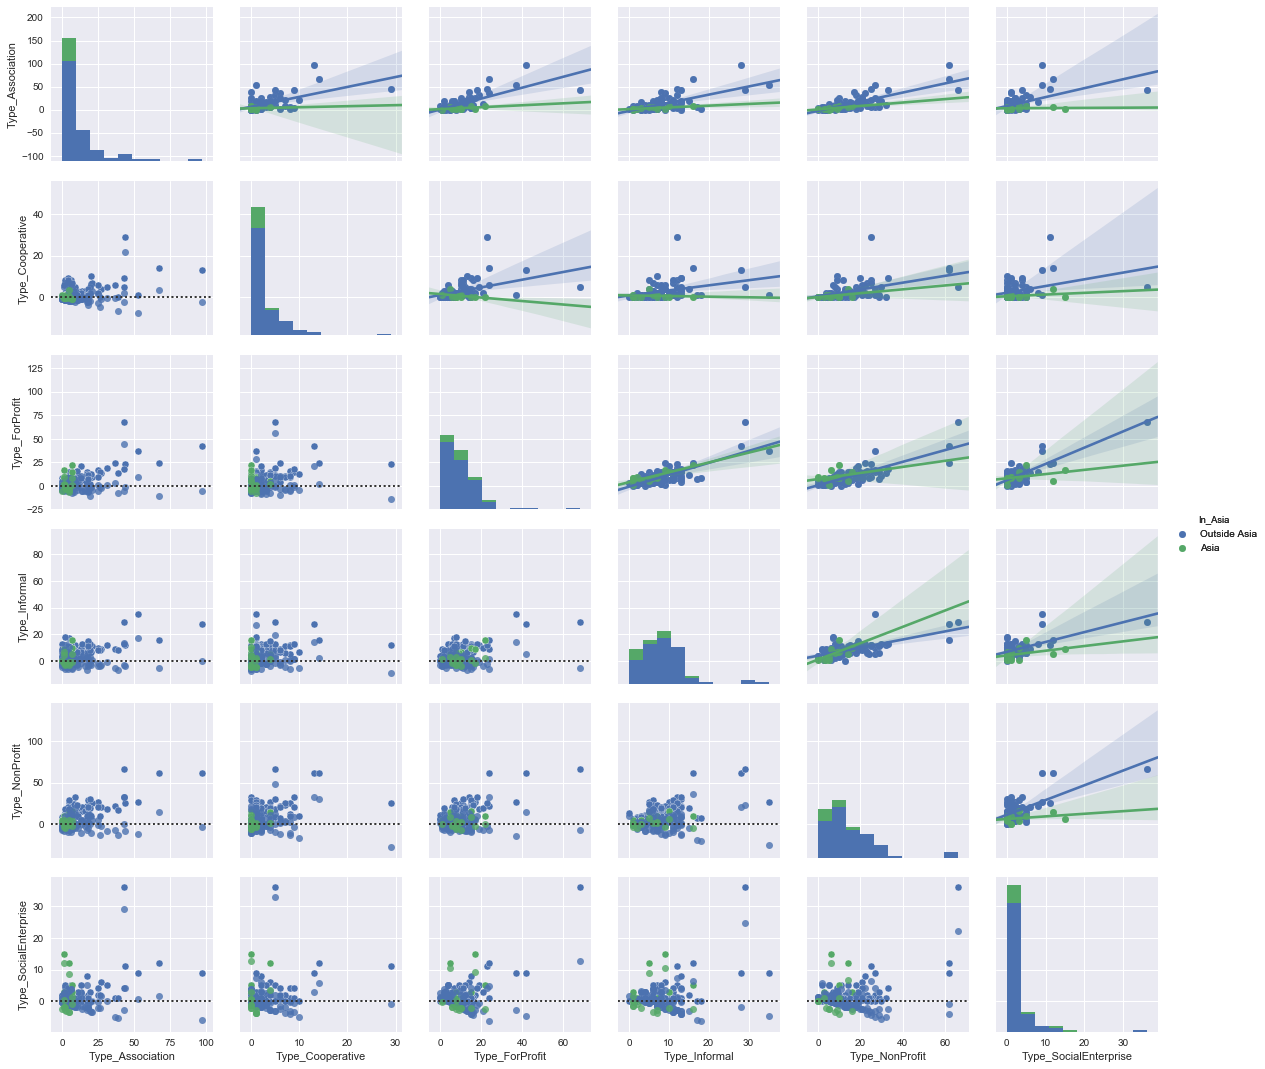

In [55]:
# in the plot below, we compare the differences between use of Web, FB and Twitter in Asia and outside Asia
# pair plot is great for showing the interactions between variables
# the diagonal shows the histogram, the lower left triangle shows the residual plot,
# the upper right triangle shows the regression plot and the 95% confidence interval for that regression

pp_online = sns.pairplot(ShareCity_Org_Sum, hue="In_Asia")
pp_online.map_diag(plt.hist)
pp_online.map_upper(sns.regplot)
pp_online.map_lower(sns.residplot)  
pp_online.add_legend()
pp_online.set(alpha=0.5)  
pp_online.savefig('pairplot3.png', dpi=200);